# Let's test your implementation of KNN 

In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# import your class on KNN
from knn import KNN

In [2]:
assert KNN is not None, 'KNN should be imported'
assert 'fit' in dir(KNN) and 'predict' in dir(KNN), 'Your implementation should follow the sklearn standards (fit and predict methods)'

# Pick 3 Datasets
Either from the /datasets available in github (which should be familiar from last week) or by directly downloading any 3 datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Import Dataset1:

In [3]:
# Note: If you implemented Knn for one feature and one label only, you will have to trim the dataset.
# BONUS: Extend your Knn Algorithm to be valid for any size of features in your dataset. 
# BONUS2: Create a function in your original knn class to calculate the time it takes to execute from start to finish.

#load to dataframe
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
df = pd.read_csv(path, skiprows=2, index_col=False,encoding="utf8")

print('Original Dataset')
print(df.head())

#make categorical variables (except the target) into one-hot encoding
df = pd.get_dummies(df,columns=df.columns.values[:-1])

#transform the target into numeric codes
labelencoder= LabelEncoder()
df.unacc = labelencoder.fit_transform(df.unacc)

#inspect the head
print('\nProcessed Dataset')
print(df.head())

Original Dataset
   vhigh vhigh.1  2 2.1 small  high  unacc
0  vhigh   vhigh  2   2   med   low  unacc
1  vhigh   vhigh  2   2   med   med  unacc
2  vhigh   vhigh  2   2   med  high  unacc
3  vhigh   vhigh  2   2   big   low  unacc
4  vhigh   vhigh  2   2   big   med  unacc

Processed Dataset
   unacc  vhigh_high  vhigh_low  vhigh_med  vhigh_vhigh  vhigh.1_high  \
0      2           0          0          0            1             0   
1      2           0          0          0            1             0   
2      2           0          0          0            1             0   
3      2           0          0          0            1             0   
4      2           0          0          0            1             0   

   vhigh.1_low  vhigh.1_med  vhigh.1_vhigh  2_2  ...  2_5more  2.1_2  2.1_4  \
0            0            0              1    1  ...        0      1      0   
1            0            0              1    1  ...        0      1      0   
2            0            0   

## Load your data into X and y

In [4]:
X,y = df.drop('unacc',axis=1).values, df.unacc.values

In [5]:
assert X is not None and type(X) == np.ndarray, 'X should be defined and be a numpy array'
assert y is not None and type(y) == np.ndarray, 'y should be defined and be a numpy array'

## Plot X showing the class

example
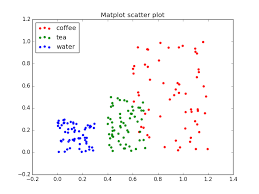

In [6]:
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)

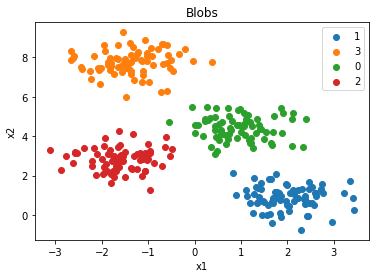

In [7]:
# plot X showing the classes hold in y
model = KNN().make_plot('Blobs')


## Fit the model

In [ ]:
# define train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=0)

In [ ]:
model = KNN(k=3).fit(X_train, y_train)

In [ ]:
assert model is not None and type(model) == KNN, 'Fit method should return itself'

## Predict the classes for the same data

In [ ]:
Train_pred_y = model.predict(X_train)
Test_pred_y = model.predict(X_test)

print('Train Accuracy {:0.2f}%'.format( model.evaluate(y_train,Train_pred_y)*100 ))
print('Test Accuracy {:0.2f}%'.format( model.evaluate(y_test,Test_pred_y)*100 ))

## Show the decission boundaries depending on K for your model
example
<img src="https://i.stack.imgur.com/ZDVhm.png" width="300"/>
(tricky one so we are going to help you out with this one)

In [ ]:
from ipywidgets import interact

@interact
def plot_decision_boundary(k=(1,10,1)):
    model = KNN(n_neighbors=k).fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z)

    for c in set(y):
        plt.scatter(*X[y==c].T)

# Repeat this process with Dataset 2 and Dataset 3

# Compare performance vs Sklearn